# Displaying Pandas DataFrames Horizontally in Jupyter Notebooks

In this tutorial, you'll learn how to display pandas DataFrames horizontally in your Jupyter Notebooks. I find this useful when presenting data to an audience or when delivering tutorials like this one.

## Default DataFrame Display

Let's begin by reading in three different DataFrames, assigning them to variable names. By default, nothing is displayed in the output when an assignment statement is the last line of a notebook cell.

In [1]:
import pandas as pd
nrows = 8
bikes = pd.read_csv('../../data/bikes.csv', nrows=nrows, 
                    usecols=['tripduration', 'temperature'])
flights = pd.read_csv('../../data/flights.csv', nrows=nrows, 
                     usecols=['airline', 'origin', 'dest'])
housing = pd.read_csv('../../data/housing.csv', nrows=nrows, 
                      usecols=['YrSold', 'SalePrice'])

If the variable name is displayed as the last line in a notebook, then it will be displayed in the output. Here, we output the `bikes` DataFrame.

In [2]:
bikes

,tripduration,temperature
0,993,73.9
1,623,69.1
2,1040,73.0
3,667,72.0
4,130,73.0
5,660,73.0
6,565,66.0
7,505,64.0


If there is any non-comment line beneath the DataFrame, then it won't be displayed in the cell. Here, we perform a simple arithmetic operation as our last line which gets evaluated and output.

In [3]:
bikes
2 + 3

5

The `print` function may be used to output other lines that do not appear as the last line. Here, both an arithmetic operation and a DataFrame are output to the screen.

In [4]:
print(8 * 9)
print(bikes)
2 + 3

72
   tripduration  temperature
0           993         73.9
1           623         69.1
2          1040         73.0
3           667         72.0
4           130         73.0
5           660         73.0
6           565         66.0
7           505         64.0


5

### Why is the visual display of the DataFrame different?

The visual display of the DataFrame is different when using the `print` function. This is because a different mechanism is used. The `print` function searches for the `__repr__` method and uses it for objects that define it. With pandas DataFrames, it is defined, and returns a string. It is this string that is printed to the string.

In [5]:
bikes.__repr__()

'   tripduration  temperature\n0           993         73.9\n1           623         69.1\n2          1040         73.0\n3           667         72.0\n4           130         73.0\n5           660         73.0\n6           565         66.0\n7           505         64.0'

When outputting DataFrames to the screen when they appear as the last line of a cell, the notebooks checks to see if a `_repr_html_` method is defined for the object. DataFrames have it defined and return a string of HTML with the values of the DataFrame in it. This string, which is printed below, is used by the notebook to display it nicely.

In [6]:
print(bikes._repr_html_())

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tripduration</th>
      <th>temperature</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>993</td>
      <td>73.9</td>
    </tr>
    <tr>
      <th>1</th>
      <td>623</td>
      <td>69.1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1040</td>
      <td>73.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>667</td>
      <td>72.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>130</td>
      <td>73.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>660</td>
      <td>73.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>565</td>
      <td>66.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>505</td>
      <td

## The `display` function

All notebooks load a `display` function by default, which can be used to display the normal DataFrame from anywhere in the cell. This avoids the uglier output with the print function.

In [7]:
display(bikes)
2 + 3

,tripduration,temperature
0,993,73.9
1,623,69.1
2,1040,73.0
3,667,72.0
4,130,73.0
5,660,73.0
6,565,66.0
7,505,64.0


5

The `display` function can output any number of objects vertically. Here, we output all three DataFrames in a single output area.

In [8]:
display(bikes, flights, housing)

,tripduration,temperature
0,993,73.9
1,623,69.1
2,1040,73.0
3,667,72.0
4,130,73.0
5,660,73.0
6,565,66.0
7,505,64.0


,airline,origin,dest
0,UA,LAS,IAH
1,WN,DEN,PHX
2,B6,JFK,BOS
3,B6,DTW,BOS
4,UA,LAS,EWR
5,WN,PHX,DEN
6,UA,BOS,ORD
7,B6,DCA,BOS


,YrSold,SalePrice
0,2008,208500
1,2007,181500
2,2008,223500
3,2006,140000
4,2008,250000
5,2009,143000
6,2007,307000
7,2009,200000


## Displaying DataFrames Horizontally

In order to display DataFrames horizontally, we need to reach deeper into the tools available to control the notebook output. The `display_html` function from the `IPython.display` module allows you to display custom HTML in the notebook. Below, we build a function that accepts a dictionary of DataFrames, collects their HTML strings with the `_repr_html_` method and places all of inside a single div element that uses the CSS flexbox layout. 

This flexbox layout displays each item horizontally. Each item in the flexbox is an HTML table element containing the DataFrame values.

In [9]:
from IPython.display import display_html

def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():
        cur_html = f'<div> <h3>{title}</h3> {df._repr_html_()}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)

We create a dictionary of our DataFrames and pass it to our custom function `display_dfs` which will create the flexbox and display the DataFrames horizontally.

In [10]:
dfs = {'Bikes': bikes, 'Flights': flights, 'Housing': housing}
display_dfs(dfs, justify='flex-start')

Bikes 

 
 
 
 
 tripduration 
 temperature 
 
 
 
 
 0 
 993 
 73.9 
 
 
 1 
 623 
 69.1 
 
 
 2 
 1040 
 73.0 
 
 
 3 
 667 
 72.0 
 
 
 4 
 130 
 73.0 
 
 
 5 
 660 
 73.0 
 
 
 6 
 565 
 66.0 
 
 
 7 
 505 
 64.0 
 
 
 
 Flights 

 
 
 
 
 airline 
 origin 
 dest 
 
 
 
 
 0 
 UA 
 LAS 
 IAH 
 
 
 1 
 WN 
 DEN 
 PHX 
 
 
 2 
 B6 
 JFK 
 BOS 
 
 
 3 
 B6 
 DTW 
 BOS 
 
 
 4 
 UA 
 LAS 
 EWR 
 
 
 5 
 WN 
 PHX 
 DEN 
 
 
 6 
 UA 
 BOS 
 ORD 
 
 
 7 
 B6 
 DCA 
 BOS 
 
 
 
 Housing 

 
 
 
 
 YrSold 
 SalePrice 
 
 
 
 
 0 
 2008 
 208500 
 
 
 1 
 2007 
 181500 
 
 
 2 
 2008 
 223500 
 
 
 3 
 2006 
 140000 
 
 
 4 
 2008 
 250000 
 
 
 5 
 2009 
 143000 
 
 
 6 
 2007 
 307000 
 
 
 7 
 2009 
 200000

## Using the splitcell notebook extension

If you have the [splitcell notebook extension enabled](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/), you can split cells so that they take up half of the notebook width.

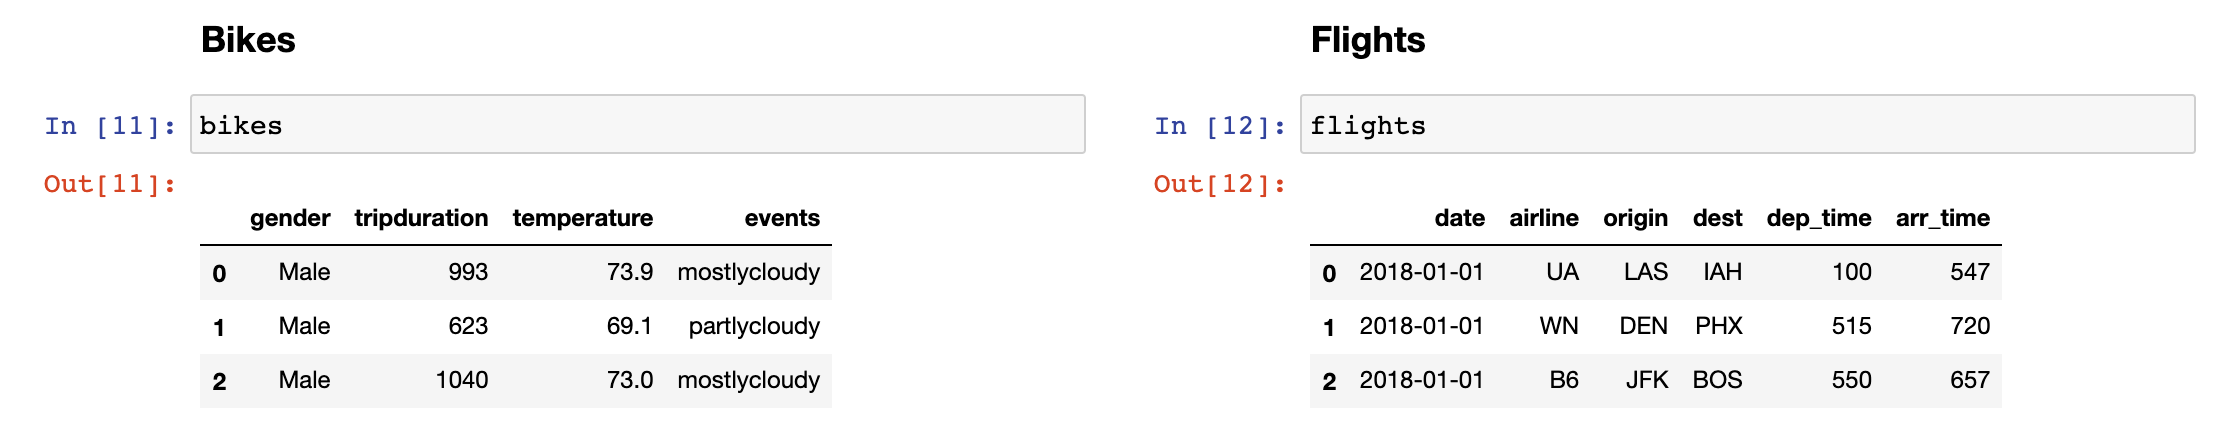